# Preprocessing

In [1]:
import warnings, platform
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [3]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## Package load

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

from sklearn.datasets import make_classification
from sklearn.datasets import make_swiss_roll

## Measure Elapsed Time

In [6]:
import time
import datetime
from timeit import timeit

In [7]:
timeit("time.sleep(1)", number=2, globals=globals())

2.006940000981558

In [8]:
start = time.time() # 시작
time.sleep(1) # 수행시간 측정하고자 하는 코드 부분
sec = time.time() - start # 종료 - 시작 (걸린 시간)
 
times = str(datetime.timedelta(seconds=sec)) # 걸린 시간 보기좋게 바꾸기
short = times.split(".")[0] # 초 단위 까지만
print(f"{times} sec")
print(f"{short} sec")

0:00:01.001974 sec
0:00:01 sec


In [9]:
%%time
time.sleep(1)

CPU times: user 918 µs, sys: 982 µs, total: 1.9 ms
Wall time: 1 s


In [10]:
%%timeit
time.sleep(1)

1 s ± 1.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Data load

In [11]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

titanic_df = pd.read_csv('./pymlrev2-main/1장/titanic_train.csv')
housing = pd.read_csv('./handson-ml2/datasets/housing/housing.csv')
diabetes = pd.read_csv('./data/diabetes.csv')

arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
arima_data['day'] = pd.to_datetime(arima_data['day'], format="%Y-%m-%d")
arima_data.set_index('day', inplace=True)

birth_data = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
ldeaths = pd.read_csv('./r_csv/datasets/ldeaths.csv').drop('Unnamed: 0', axis=1)

def parser(x):
    return datetime.datetime.strptime('190' + x, '%Y-%m')

shampoo = pd.read_csv('./data/shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

mercari_df = pd.read_csv('./data/mercari_train.tsv', sep='\t')
y_train_df = mercari_df['price']

students = pd.DataFrame({'이름':['장화', '홍련', '콩쥐', '팥쥐', '해님', '달님'], 
                         '국어': [70, 85, None, 100, None, 85], 
                         '수학':[65, 100, 80, 95, None, 70]})

health = pd.DataFrame({'연도': [2017, 2018, 2019, 2020, 2021, 2022], 
                       '키': [160, 162, 165, None, None, 166],
                       '몸무게': [53, 52, None, 50, 51, 54],
                       '시력': [1.2, None, 1.2, 1.2, 1.1, 0.8],
                       '병결': [None, None, None, 2, None, 1]})

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
item_df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

## Missing Value

### (1) Find NA

#### Is/Not NA

In [12]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [13]:
students.isna()

,이름,국어,수학
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,True
5,False,False,False


In [14]:
students.notna()

,이름,국어,수학
0,True,True,True
1,True,True,True
2,True,False,True
3,True,True,True
4,True,False,False
5,True,True,True


#### NA Count

In [15]:
### column 별 NA 개수
students.isna().sum()

이름    0
국어    2
수학    1
dtype: int64

In [16]:
### row 별 NA 개수
students.isna().sum(1)

0    0
1    0
2    1
3    0
4    2
5    0
dtype: int64

In [17]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Missing Graph

In [19]:
import missingno as msno

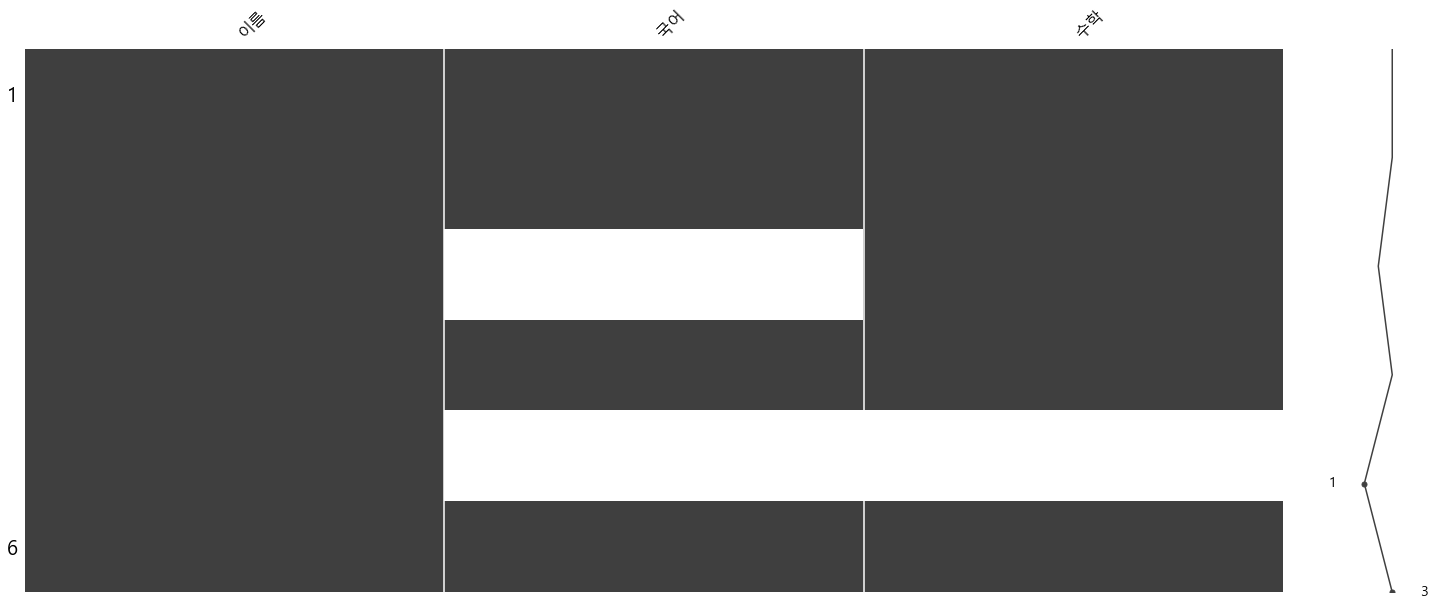

In [20]:
### Missingmap
# 큰 데이터의 missing 확인에 유용
msno.matrix(students)
plt.show()

### (2) Drop NA

In [21]:
students.dropna() # 결측 행 삭제, axis 변수 또는 'index'/'columns'으로 행/열 조정 가능

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [22]:
students.dropna(thresh=2) # 결측값 아닌 개수 지정

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [23]:
students.dropna(subset=['수학']) # subset에 NA가 있는 경우 제거

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [24]:
students.dropna(how='all', subset=['국어', '수학']) # 국어, 수학이 모두 NA이면 삭제

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [25]:
students.dropna(how='any') # 한 컬럼 이상이면 삭제

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


### (3) NA Impute

#### Fill NA

In [26]:
students.fillna(value=0)

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,0.0,80.0
3,팥쥐,100.0,95.0
4,해님,0.0,0.0
5,달님,85.0,70.0


In [27]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [28]:
health # original table

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,NaN
1,2018,162.0,52.0,NaN,NaN
2,2019,165.0,NaN,1.2,NaN
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,NaN
5,2022,166.0,54.0,0.8,1.0


In [29]:
health.fillna(0)

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,0.0,0.0
2,2019,165.0,0.0,1.2,0.0
3,2020,0.0,50.0,1.2,2.0
4,2021,0.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [30]:
health.fillna(health.mean()) # 평균으로 채우기

,연도,키,몸무게,시력,병결
0,2017,160.00,53.0,1.2,1.5
1,2018,162.00,52.0,1.1,1.5
2,2019,165.00,52.0,1.2,1.5
3,2020,163.25,50.0,1.2,2.0
4,2021,163.25,51.0,1.1,1.5
5,2022,166.00,54.0,0.8,1.0


In [31]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
### column별 NA 채우기
health['병결'] = health['병결'].fillna(0)
health['몸무게'] = health['몸무게'].fillna(health['몸무게'].mean())
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,NaN,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [33]:
### pad/ffill, backfill/bfill
health.fillna(method='pad', inplace=True) # 직전 값으로 대체. ffill 옵션도 동일한 결과. 그리고 원본 데이터를 반영 (inplace)
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,165.0,50.0,1.2,2.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


#### Imputer
- SimpleImputer
- KNNImputer: KNN모델을 사용한 Imputer

In [34]:
### 새로운 feature 만들기 (is_na 등)
np.where(health['키'].isna(), 1, 0)

array([0, 0, 0, 0, 0, 0])

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
### Imputer: 모든 수치형 변수에 적용
imputer = SimpleImputer(strategy="median")

In [37]:
housing_num = housing.drop("ocean_proximity", axis=1) # 수치 변수만 추출
imputer.fit(housing_num) 
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [38]:
housing_num.median().values # imputer가 저장하고 있는 것과 동일

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [39]:
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

In [40]:
from sklearn.impute import KNNImputer

In [41]:
### KNN Imputation
# 수치형 변수에만 사용 가능
imputer = KNNImputer()

In [42]:
x = imputer.fit_transform(housing_num) # fit and transform
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

#### Impute with Model
- Regression imputation: 변수의 분산을 줄인다는 단점이 있음
- Single stochastic imputation

In [43]:
### diabates data
# 0이 되면 안되는 변수들 선택
diabetes.loc[diabetes["Glucose"]==0.0, "Glucose"] = np.NAN
diabetes.loc[diabetes["BloodPressure"]==0.0, "BloodPressure"] = np.NAN
diabetes.loc[diabetes["SkinThickness"]==0.0, "SkinThickness"] = np.NAN
diabetes.loc[diabetes["Insulin"]==0.0, "Insulin"] = np.NAN
diabetes.loc[diabetes["BMI"]==0.0, "BMI"] = np.NAN

diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [44]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [45]:
for feature in missing_columns:
    diabetes[feature + '_imp'] = diabetes[feature]

    number_missing = diabetes[feature].isnull().sum()
    observed_values = diabetes.loc[diabetes[feature].notnull(), feature]
    diabetes.loc[diabetes[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace=True)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
### Regression imputation
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
    deter_data["Det" + feature] = diabetes[feature + "_imp"]
    parameters = list(set(diabetes.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    model.fit(diabetes[parameters], diabetes[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[diabetes[feature].isnull(), "Det" + feature] = model.predict(diabetes[parameters])[diabetes[feature].isnull()]

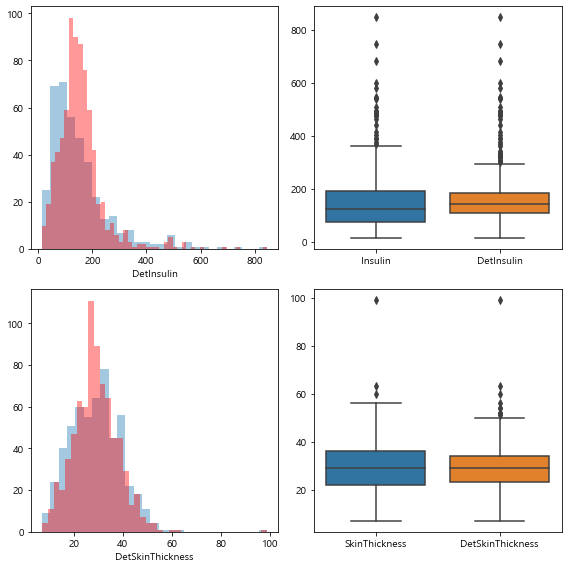

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(diabetes[variable].dropna(), kde=False, ax=axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde=False, ax=axes[index, 0], color='red') 
    sns.boxplot(data = pd.concat([diabetes[variable], deter_data["Det" + variable]], axis=1), ax=axes[index, 1])
    
plt.tight_layout()

In [49]:
### Single Stochastic Imputation
random_data = pd.DataFrame(columns=["Ran" + name for name in missing_columns])

for feature in missing_columns:
    random_data["Ran" + feature] = diabetes[feature + '_imp']
    parameters = list(set(diabetes.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = LinearRegression()
    model.fit(diabetes[parameters], diabetes[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(diabetes[parameters])
    std_error = (predict[diabetes[feature].notnull()] - diabetes.loc[diabetes[feature].notnull(), feature + '_imp']).std()
    
    # observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size=diabetes[feature].shape[0], loc = predict, scale = std_error)
    random_data.loc[(diabetes[feature].isnull()) & (random_predict > 0),
                    "Ran" + feature] = random_predict[(diabetes[feature].isnull()) & (random_predict > 0)]

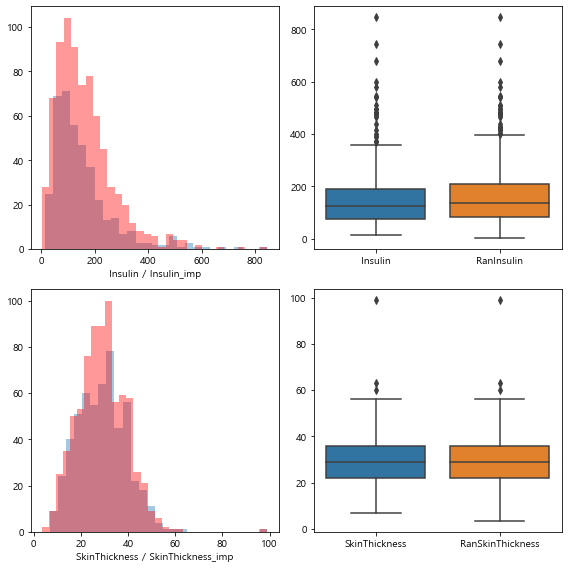

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(diabetes[variable].dropna(), kde=False, ax=axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde=False, ax=axes[index, 0], color='red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    sns.boxplot(data = pd.concat([diabetes[variable], random_data["Ran" + variable]], axis=1), ax=axes[index, 1])
    
plt.tight_layout()

## Duplicates

### (1) Drop Duplicates

In [51]:
health['키'].drop_duplicates().tolist()

[160.0, 162.0, 165.0, 166.0]

In [52]:
set(health['키'])

{160.0, 162.0, 165.0, 166.0}

In [53]:
health[['시력','병결']].drop_duplicates() # 모든 컬럼이 같은 경우에만 제거

,시력,병결
0,1.2,0.0
3,1.2,2.0
4,1.1,0.0
5,0.8,1.0


In [54]:
health.drop_duplicates(subset=['시력']) # 특정 컬럼 기준 drop

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


### (2) Find Duplicates

In [55]:
health # original table

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,165.0,50.0,1.2,2.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [56]:
# find
health[health.duplicated(subset=['시력', '병결'], keep='first')]

,연도,키,몸무게,시력,병결
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0


In [57]:
# find all duplicates (include first)
pd.concat([health[health.duplicated(subset=['시력', '병결'], keep='first')], 
           health[health.duplicated(subset=['시력', '병결'], keep='last')]]).drop_duplicates()

,연도,키,몸무게,시력,병결
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
0,2017,160.0,53.0,1.2,0.0


## Outlier

### (1) Outlier detect
- IQR Method: Q1 - 1.5*IQR < normal data < Q3 + 1.5*IQR
- ESD (Extreme Studentized Deviation) Method
    - 평균 - 3*SD < normal data < 평균 + 3*SD
    - 기하평균 - 2.5*SD < normal data < 기하평균 + 2.5*SD
- DBSCAN 군집 분석: -1로 분류되는 값이 이상치

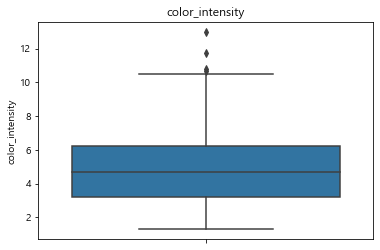

In [58]:
sns.boxplot(y=wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

#### IQR

In [59]:
### Outlier detect function
def outliers_iqr(df, column):
    quartile_1, quartile_3 = np.percentile(df[column], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    
    outliers = df[(df[column] > upper_whis) | (df[column] < lower_whis)]
    
    return outliers[[column]]

In [60]:
outliers = outliers_iqr(df=wine, column='color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


#### ESD

In [61]:
### Outlier detect function
def outliers_esd(df, column):
    sd = np.std(df[column])
    lower_whis = np.mean(df[column]) - 3*sd
    upper_whis = np.mean(df[column]) + 3*sd
    
    outliers = df[(df[column] > upper_whis) | (df[column] < lower_whis)]
    
    return outliers[[column]]

In [62]:
outliers = outliers_esd(df=wine, column='color_intensity')
outliers

,color_intensity
158,13.0


#### DBSCAN 
- -1로 클러스터링 된 데이터를 outlier로 함
- DBSCAN 부분 참고

### (2) Outlier cleansing

#### Trimming
- 경계값을 초과하는 Outlier 삭제

In [63]:
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (177, 14)


In [64]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN # Outlier를 NA로 만든 다음, 대체
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean()) # 평균 치환
wine.loc[outliers.index, 'color_intensity']

158    5.01322
Name: color_intensity, dtype: float64

#### Winsorizing, Clipping
- Winsorizing: 이상치의 상/하한선을 넘는 값을 상/하한으로 조정
- Clipping: 이상치 상/하한 특정 값으로 지정하고, 넘는 값을 상/하한으로 조정

In [65]:
from scipy.stats.mstats import winsorize

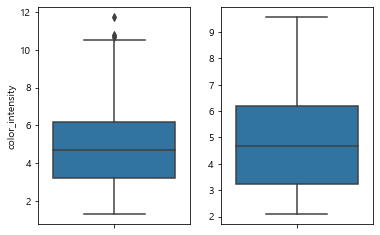

In [66]:
winsorized = winsorize(wine['color_intensity'], (0.05, 0.05))

fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(y=wine['color_intensity'], ax=axes[0])
sns.boxplot(y=winsorized, ax=axes[1])
plt.show()

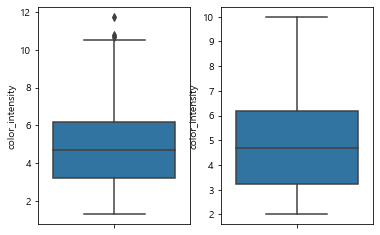

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(y=wine['color_intensity'], ax=axes[0])
sns.boxplot(y=wine['color_intensity'].clip(2, 10), ax=axes[1])
plt.show()

## Categorical data
- 범주형 변수의 수학적 연산이 가능하게끔 함: Dummy 변수 생성
- Label(Ordinal) encoding, One-hot encoding
- LabelBinarizer는 sparse matrix의 One-hot encoding에 사용

In [68]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, LabelBinarizer, OneHotEncoder

### (1) LabelEncoder, OrdinalEncoder
- cat -> num
- target을 숫자로 변환하는 데 용이하며, ML 모델에 사용하기에는 적합하지 않음
- category 형태로 변환이 필요할 수 있음

In [69]:
### LabelEncoder
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [70]:
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본 값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [71]:
### OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

### (2) LabelBinarizer
- Sparse One-hot encoding

In [72]:
lb = LabelBinarizer(sparse_output=True)
lb.fit([1, 2, 6, 4, 2])

LabelBinarizer(sparse_output=True)

In [73]:
lb.classes_

array([1, 2, 4, 6])

In [74]:
lb.transform([1, 6]).toarray()

array([[1, 0, 0, 0],
       [0, 0, 0, 1]])

In [75]:
lb.fit(np.array([[0, 1, 1], [1, 0, 0]]))
lb.classes_

array([0, 1, 2])

In [76]:
lb.transform([0, 1, 2, 1]).toarray()

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

### (3) One-hot encoder
- 변수의 모든 수준(Level)들을 각각 새로운 변수로 만들어 0 또는 1의 값을 가지도록 변환

#### OneHotEncoder()

In [77]:
encoder = OneHotEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [78]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [79]:
encoder.get_feature_names()

array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

In [80]:
housing_cat_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [81]:
# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


#### get_dummies()
- 숫자 형태의 변수에는 적용되지 않음

In [82]:
dummy_col = pd.get_dummies(item_df)
dummy_col

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [83]:
# 생성된 dummy의 T/F를 1/0으로 변경
for col in dummy_col:
    dummy_col[col] = np.where(dummy_col[col], 1, 0)
    
pd.get_dummies(iris, columns=['Class'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [84]:
pd.get_dummies(iris, columns=['Class'], drop_first=True) # drop_first는 변수 개수를 1개 줄이는 효과가 있음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


### (4) Frequency Encoding
- Category의 빈도에 따른 encoding
- 중복되는 값이 나올 수 있음

In [85]:
item_df.groupby('item').size() / len(item_df)

item
TV       0.125
냉장고      0.125
믹서       0.250
선풍기      0.250
전자레인지    0.125
컴퓨터      0.125
dtype: float64

### (5) Target Encoding
- 특정 컬럼의 요약 값에 따른 encoding
- Frequency 방법의 확장판 

In [86]:
# sepal length의 평균에 따른 encoding
iris.groupby('Class')['sepal length (cm)'].mean()

Class
Setosa         5.006
Versicolour    5.936
Virginica      6.588
Name: sepal length (cm), dtype: float64

### (6) Feature Hashing
- 늘어날 특징의 개수를 한정하면서 변수 변환
- FeatureHasher: Hashed array 반환
- 선형 또는 커널 모델에만 적합하고, 해시된 특징은 해석 불가

In [87]:
from sklearn.feature_extraction import FeatureHasher

In [88]:
h = FeatureHasher(n_features=10)

hash_data = [{'dog': 1, 'cat':2, 'elephant':4}, {'dog': 2, 'run': 5}]
f = h.transform(hash_data)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

In [89]:
h = FeatureHasher(n_features=8, input_type="string")

raw_x = [["dog", "cat", "snake"], ["snake", "dog"], ["cat", "bird"]]

f = h.transform(raw_x)
f.toarray()

array([[ 0.,  0.,  0., -1.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Data Split
- ML 모델에서는 7:3또는 6:2:2가 권장되나, 최근 train 비율을 더 높이기도 함
- Cross-Validation 기법과 연계

### (1) General Split
- Holdout은 학습/검증 비율을 5:5로 하는 것으로 정의됨

#### Basic

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# train_test_split(x, y, test_size, random_state, shuffle, stratify)
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2)

print('x_train :', x_train.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

x_train : (120, 4) 	x_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [92]:
iris['Class'].value_counts()

Versicolour    50
Virginica      50
Setosa         50
Name: Class, dtype: int64

In [93]:
y_train.value_counts() # class 불균형

Setosa         42
Versicolour    39
Virginica      39
Name: Class, dtype: int64

#### Stratified

In [94]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2, stratify=iris['Class'])
print('x_train :', x_train.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

x_train : (120, 4) 	x_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [95]:
y_train.value_counts()

Versicolour    40
Virginica      40
Setosa         40
Name: Class, dtype: int64

### (2) K-Fold
- 데이터를 K개 집단으로 분할한 뒤, 1개 집단을 검증 데이터로 함
- K번 반복하여 각 분할별로 한번씩 검증 데이터로 사용

#### Basic

In [96]:
from sklearn.model_selection import KFold

In [97]:
kf = KFold(n_splits=5)
kf.get_n_splits(X=iris.drop(columns='Class', axis=1), y=iris['Class'])
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [98]:
iris_features = iris.drop(columns='Class', axis=1)
iris_label = iris['Class']

for i, (train_index, test_index) in enumerate(kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]

Fold 0:
  Train: index=[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 1

#### Stratified

In [99]:
from sklearn.model_selection import StratifiedKFold

In [100]:
s_kf = StratifiedKFold(n_splits=5)
s_kf.get_n_splits(X=iris_features, y=iris_label)
s_kf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [101]:
for i, (train_index, test_index) in enumerate(s_kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]
    
    print('학습 레이블 데이터 분포:\n', y_train.value_counts())
    print('검증 레이블 데이터 분포:\n', y_test.value_counts())

Fold 0:
  Train: index=[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
학습 레이블 데이터 분포:
 Versicolour    40
Virginica      40
Setosa         40
Name: Class, dtype: int64
검증 레이블 데이터 분포:
 Setosa         10
Virginica      10
Versicolour    10
Name: Class, dtype: int64
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  4

#### Group
- 범주형 변수(Group)의 수준 별 데이터를 각 분할마다 검증 데이터로 사용
- Group 개수는 K와 같거나 커야 함

In [102]:
from sklearn.model_selection import GroupKFold

In [103]:
x = np.array([0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10])
y = np.array(["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"])
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3])

gkf = GroupKFold(n_splits=3)
gkf.get_n_splits(x, y, groups)

3

In [104]:
for train_index, test_index in gkf.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('x_train:', x_train, '\nx_test:', x_test)
    print('y_train:', y_train, '\ny_test:', y_test)

TRAIN: [0 1 2 3 4 5] TEST: [6 7 8 9]
x_train: [0.1  0.2  2.2  2.4  2.3  4.55] 
x_test: [ 5.8  8.8  9.  10. ]
y_train: ['a' 'b' 'b' 'b' 'c' 'c'] 
y_test: ['c' 'd' 'd' 'd']
TRAIN: [0 1 2 6 7 8 9] TEST: [3 4 5]
x_train: [ 0.1  0.2  2.2  5.8  8.8  9.  10. ] 
x_test: [2.4  2.3  4.55]
y_train: ['a' 'b' 'b' 'c' 'd' 'd' 'd'] 
y_test: ['b' 'c' 'c']
TRAIN: [3 4 5 6 7 8 9] TEST: [0 1 2]
x_train: [ 2.4   2.3   4.55  5.8   8.8   9.   10.  ] 
x_test: [0.1 0.2 2.2]
y_train: ['b' 'c' 'c' 'c' 'd' 'd' 'd'] 
y_test: ['a' 'b' 'b']


In [105]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

groups = np.array([0, 0, 2, 2])
group_kfold = GroupKFold(n_splits=2)

group_kfold.get_n_splits(x, y, groups)

print(group_kfold)

GroupKFold(n_splits=2)


In [106]:
for train_index, test_index in group_kfold.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('x_train:', x_train, '\nx_test:', x_test)
    print('y_train:', y_train, '\ny_test:', y_test)

TRAIN: [0 1] TEST: [2 3]
x_train: [[1 2]
 [3 4]] 
x_test: [[5 6]
 [7 8]]
y_train: [1 2] 
y_test: [3 4]
TRAIN: [2 3] TEST: [0 1]
x_train: [[5 6]
 [7 8]] 
x_test: [[1 2]
 [3 4]]
y_train: [3 4] 
y_test: [1 2]


In [107]:
group_kfold.get_n_splits(X=iris.drop(columns='Class', axis=1), y=iris['Class'])
group_kfold

GroupKFold(n_splits=2)

#### Repeated
- 데이터셋 크기가 크지 않은 경우, 안정된 검증 점수를 위해 교차 검증을 반복하는 것
- n_splits default 5, n_repeats default 10
- RepeatedKFold, RepeatedStratifiedKFold

In [108]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold

In [109]:
r_kf = RepeatedKFold(n_splits=3, n_repeats=2) 

for i, (train_index, test_index) in enumerate(r_kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]

Fold 0:
  Train: index=[  1   4   6   7   8  10  12  13  14  15  16  19  20  21  22  23  25  26
  28  29  30  32  35  37  39  40  41  43  44  45  47  49  50  51  52  53
  54  56  57  59  62  63  64  65  66  67  68  69  71  72  73  74  75  76
  78  79  80  81  82  83  85  86  87  88  89  92  93  94  95  96  97  99
 100 103 105 106 107 108 109 110 111 113 115 116 117 120 121 124 130 133
 134 135 136 137 138 142 144 145 146 147]
  Test:  index=[  0   2   3   5   9  11  17  18  24  27  31  33  34  36  38  42  46  48
  55  58  60  61  70  77  84  90  91  98 101 102 104 112 114 118 119 122
 123 125 126 127 128 129 131 132 139 140 141 143 148 149]
Fold 1:
  Train: index=[  0   2   3   5   8   9  11  12  14  15  16  17  18  19  20  22  24  26
  27  29  31  33  34  36  38  41  42  44  45  46  48  50  52  53  55  58
  60  61  65  66  67  69  70  71  72  74  75  77  78  79  82  83  84  85
  86  88  89  90  91  92  93  95  96  98 100 101 102 103 104 106 109 110
 112 113 114 116 118 119 121 122 123

In [110]:
rs_kf = RepeatedKFold(n_splits=3, n_repeats=2) 

for i, (train_index, test_index) in enumerate(rs_kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]

Fold 0:
  Train: index=[  0   3   4   5   6   9  10  12  14  15  16  17  18  19  20  22  23  24
  27  28  29  31  33  34  37  39  40  41  46  47  48  50  51  52  53  54
  55  57  58  59  60  63  65  66  68  69  71  72  73  74  75  76  78  79
  81  84  86  87  89  90  93  95  96  97  98 100 105 107 109 110 112 113
 114 116 117 120 121 122 123 124 125 126 127 128 129 130 131 133 134 135
 136 137 139 141 144 145 146 147 148 149]
  Test:  index=[  1   2   7   8  11  13  21  25  26  30  32  35  36  38  42  43  44  45
  49  56  61  62  64  67  70  77  80  82  83  85  88  91  92  94  99 101
 102 103 104 106 108 111 115 118 119 132 138 140 142 143]
Fold 1:
  Train: index=[  0   1   2   7   8   9  11  13  14  20  21  22  23  24  25  26  28  29
  30  32  33  35  36  38  39  42  43  44  45  46  47  49  50  52  54  55
  56  57  59  60  61  62  64  65  66  67  70  71  73  74  77  78  80  81
  82  83  84  85  88  90  91  92  93  94  96  99 101 102 103 104 106 107
 108 110 111 112 113 114 115 118 119

### (3) Shuffle
- 무작위 순열 교차 검증에 사용

#### Basic

In [111]:
from sklearn.model_selection import ShuffleSplit

In [112]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])

rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
print(rs)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)


In [113]:
for i, (train_index, test_index) in enumerate(rs.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3 0 4]
  Test:  index=[5 2]
Fold 1:
  Train: index=[4 0 2 5]
  Test:  index=[1 3]
Fold 2:
  Train: index=[1 2 4 0]
  Test:  index=[3 5]
Fold 3:
  Train: index=[3 4 1 0]
  Test:  index=[5 2]
Fold 4:
  Train: index=[3 5 1 0]
  Test:  index=[2 4]


In [114]:
# Specify train and test size
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25, random_state=0)

for i, (train_index, test_index) in enumerate(rs.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3 0]
  Test:  index=[5 2]
Fold 1:
  Train: index=[4 0 2]
  Test:  index=[1 3]
Fold 2:
  Train: index=[1 2 4]
  Test:  index=[3 5]
Fold 3:
  Train: index=[3 4 1]
  Test:  index=[5 2]
Fold 4:
  Train: index=[3 5 1]
  Test:  index=[2 4]


#### Stratified

In [115]:
from sklearn.model_selection import StratifiedShuffleSplit

In [116]:
x = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])

In [117]:
ss = StratifiedShuffleSplit(n_splits=5 , test_size=0.5, random_state=0)
print(ss)

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)


In [118]:
for i, (train_index, test_index) in enumerate(ss.split(x, y)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[5 2 3]
  Test:  index=[4 1 0]
Fold 1:
  Train: index=[5 1 4]
  Test:  index=[0 2 3]
Fold 2:
  Train: index=[5 0 2]
  Test:  index=[4 3 1]
Fold 3:
  Train: index=[4 1 0]
  Test:  index=[2 3 5]
Fold 4:
  Train: index=[0 5 1]
  Test:  index=[3 4 2]


## Scaling
- 표준화 (Standardization): 표준정규분포화
- 정규화 (Normalization): 범위 지정 (보통 0-1)

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, Normalizer

In [120]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2)

### (1) Standard
- Classification에서 유용

In [121]:
std_scaler = StandardScaler()

x_train_sc = std_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = std_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.42, 3.08) (-0.00, 1.00)
Test_scaled (-1.89, 2.62) (-0.02, 1.03)


In [122]:
# scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=x_train_sc, columns=x_train.columns)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.292470,-0.126076,0.474136,0.276010
1,0.171448,-0.355306,0.417011,0.410650
2,1.018603,0.561613,1.102509,1.757041
3,-1.159795,1.249302,-1.353858,-1.474299
4,-0.433663,-1.501455,0.017137,-0.127907


### (2) MinMax
- Regression에서 유용

In [123]:
mm_scaler = MinMaxScaler()

x_train_sc = mm_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = mm_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.45, 0.26)
Test_scaled (-0.03, 0.96) (0.44, 0.27)


In [124]:
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=x_train_sc, columns=x_train.columns)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.485714,0.416667,0.610169,0.541667
1,0.457143,0.375000,0.593220,0.583333
2,0.657143,0.541667,0.796610,1.000000
3,0.142857,0.666667,0.067797,0.000000
4,0.314286,0.166667,0.474576,0.416667


### (3) MaxAbs

In [125]:
ma_scaler = MaxAbsScaler()

x_train_sc = ma_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = ma_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.23)
Test_scaled (0.04, 0.96) (0.61, 0.24)


### (4) Robust
- 이상치가 있는 데이터의 경우
- quantile_range 파라미터 조정 가능 (default [0.25, 0.75])

In [126]:
robust_scaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
x_train_sc = robust_scaler.fit_transform(x_train)
x_test_sc = robust_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.00, 2.80) (-0.02, 0.65)
Test_scaled (-1.20, 2.40) (-0.03, 0.66)


### (5) Quantile
- output_distribution으로 uniform, normal 지정 가능
- 분위를 사용하여 데이터를 균등하게 분포시키며 (uniform의 경우) 0-1 사이 값으로 변환
- 이상치에 민감하지 않음

In [127]:
q_scaler = QuantileTransformer()

x_train_sc = q_scaler.fit_transform(x_train)
x_test_sc = q_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.50, 0.29)
Test_scaled (0.00, 0.99) (0.50, 0.30)


### (6) Normalizer
- Feature Vector의 유클리드 길이가 1이 되도록 조정
- 지름이 1인 원에 데이터 포인트 투영
- 벡터의 길이는 상관없고, 방향만 중요한 경우 사용

In [128]:
norm_scaler = Normalizer()

x_train_no = norm_scaler.fit_transform(x_train)
x_test_no = norm_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_no.min(), x_train_no.max(),  x_train_no.mean(),  x_train_no.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_no.min(), x_test_no.max(),  x_test_no.mean(),  x_test_no.std()))

		(min, max) (mean, std)
Train_scaled (0.01, 0.86) (0.44, 0.24)
Test_scaled (0.02, 0.83) (0.44, 0.24)


### (7) Scale revert

In [129]:
x_original = q_scaler.inverse_transform(x_train_sc)
pd.DataFrame(x_original).head(3)

,0,1,2,3
0,6.1,3.0,4.6,1.4
1,6.0,2.9,4.5,1.5
2,6.7,3.3,5.7,2.5


In [130]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
65,6.7,3.1,4.4,1.4
29,4.7,3.2,1.6,0.2
95,5.7,3.0,4.2,1.2
128,6.4,2.8,5.6,2.1


### (7) Scale and split
- train data에 fit, test data는 train 기준으로 변환 (권장)
- 변환 수행 후 분할

In [131]:
# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [132]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [133]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [134]:
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## Transformation

### (1) Log Transformation
- 큰 수의 범위 압축, 작은 수의 범위 확장
- Skewness 감소, 이상치 영향 감소 효과
- Target(y)에 적용 시 성능 증가 효과

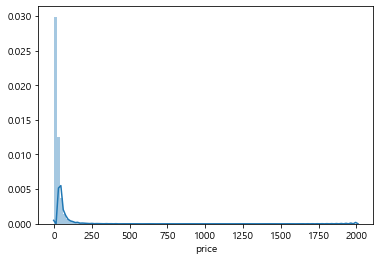

In [135]:
### mercari price data
plt.figure(figsize=(6, 4))
sns.distplot(y_train_df, bins=100)
plt.show()

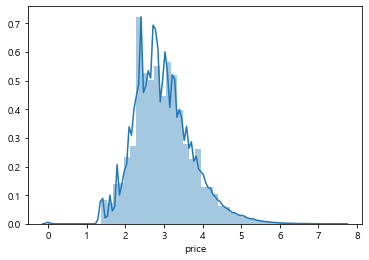

In [136]:
y_train_df_log = np.log1p(y_train_df)
sns.distplot(y_train_df_log, bins=50)
plt.show()

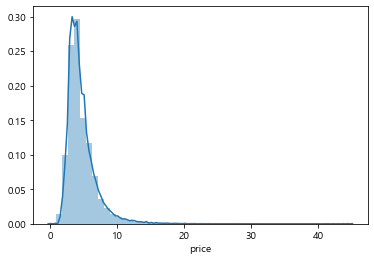

In [137]:
### (참고) Root 변환
# log보다 변환 강도가 낮음
sns.distplot(np.sqrt(y_train_df), bins=50)
plt.show()

### (2) Exponential Transformation
- Log Transformation의 반대 연산

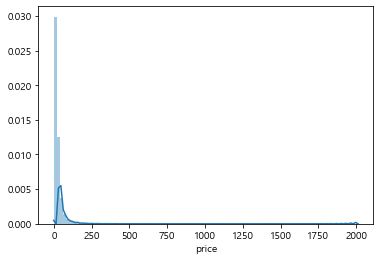

In [138]:
y_train_df_exp = np.exp(y_train_df_log)
sns.distplot(y_train_df_exp, bins=100)
plt.show()

### (3) Power Transformation
- Log변환을 일반화한 것
- 분산 안정화 변환
- Methods
    - Box-cox: 파라미터 lambda는 데이터를 통해 결정되며, lambda에 따라 변환할 power가 달라짐 (lambda=0이면 logY 변환). 양수 데이터에만 적용 가능
    - Yeo-Johnson: 음수를 포함한 실수 전체에 적용 가능

In [139]:
from sklearn.preprocessing import PowerTransformer

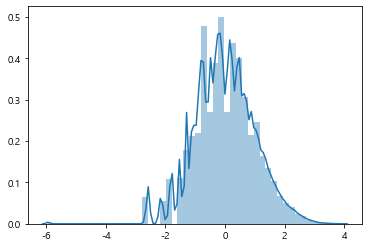

In [140]:
### box-cox
ptb = PowerTransformer(method='box-cox')
y_ptb = ptb.fit_transform((y_train_df.values + 1).reshape(-1, 1)) # 0을 포함하지 않는 양수여야 하므로, + 1 더하여 변환
sns.distplot(y_ptb.reshape(1, -1), bins=50)
plt.show()

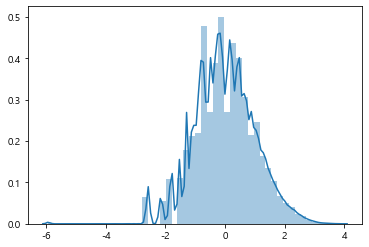

In [141]:
### yeo-johnson
pty = PowerTransformer(method='yeo-johnson')
y_pty = pty.fit_transform((y_train_df.values).reshape(-1, 1))
sns.distplot(y_pty.reshape(1, -1), bins=50)
plt.show()

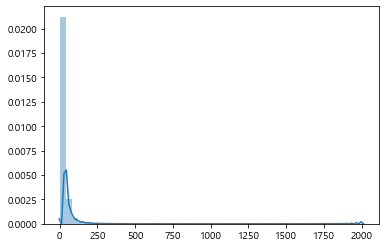

In [142]:
### 역변환
ptb_inv = ptb.inverse_transform((y_ptb).reshape(-1, 1))
sns.distplot(ptb_inv.reshape(1, -1) - 1, bins=50)
plt.show()

### (4) Sine, Cosine
- 주기적인 패턴이 있는 경우의 변환

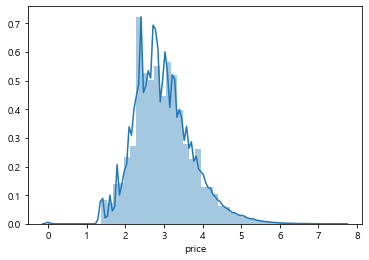

In [143]:
y_train_df_cos = np.cos(y_train_df) # np.sin
sns.distplot(y_train_df_log, bins=50)
plt.show()

### (5) Rank
- 순위 값으로 치환
- 비모수적 통계 적용할때 많이 사용

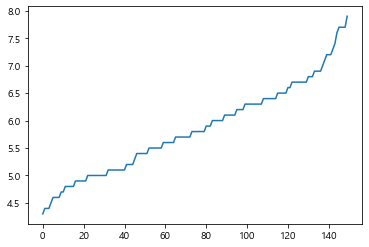

In [144]:
sepal_length = iris['sepal length (cm)'].sort_values(inplace=False).reset_index(drop=True)
sns.lineplot(data=sepal_length)
plt.show()

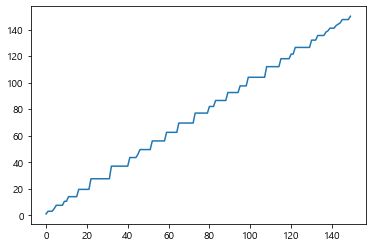

In [145]:
sepal_length_rank = iris['sepal length (cm)'].rank().sort_values(inplace=False).reset_index(drop=True)
sns.lineplot(data=sepal_length_rank)
plt.show()

### (6) Binning
- 구간 분할하여 categorical data로 변환
- pd.cut, KbinsDiscretizer
- input은 numpy array

#### pandas.cut

In [146]:
# 동일 길이로 나누기
bins = pd.cut(iris['sepal length (cm)'].values, 3)
bins.describe()

,counts,freqs
categories,,
"(4.296, 5.5]",59,0.393333
"(5.5, 6.7]",71,0.473333
"(6.7, 7.9]",20,0.133333


In [147]:
# 구간 값 정하고, 라벨 추가
bins = pd.cut(iris['sepal length (cm)'].values, bins=[4, 5, 6, 7, 8], labels=['bad', 'soso', 'med', 'good'])
bins.describe()

,counts,freqs
categories,,
bad,32,0.213333
soso,57,0.380000
med,49,0.326667
good,12,0.080000


In [148]:
# 동일 개수로 나누기
bins = pd.qcut(iris['sepal length (cm)'].values, 3)
bins.describe()

,counts,freqs
categories,,
"(4.2989999999999995, 5.4]",52,0.346667
"(5.4, 6.3]",56,0.373333
"(6.3, 7.9]",42,0.280000


In [149]:
# 구간에 들어갈 비율 조정
bins = pd.qcut(iris['sepal length (cm)'].values, [0, 0.25, 0.75, 1]) 
bins.describe()

,counts,freqs
categories,,
"(4.2989999999999995, 5.1]",41,0.273333
"(5.1, 6.4]",74,0.493333
"(6.4, 7.9]",35,0.233333


#### KBinsDiscretizer
- strategy: quantile(분위수), uniform(구간 크기)
- encoding: 없음(sparse matrix 반환), ordinal(OrdinalEncoder 형식), onehot-dense(OneHotEncoder 형식)

In [150]:
from sklearn.preprocessing import KBinsDiscretizer

In [151]:
kb = KBinsDiscretizer(n_bins=3, strategy='quantile') # quantile, no encoding
kb.fit(np.array(iris['sepal length (cm)']).reshape(-1, 1)) # reshape 필요

KBinsDiscretizer(n_bins=3)

In [152]:
kbbin = kb.bin_edges_[0] # binning 기준
kbbin

array([4.3, 5.4, 6.3, 7.9])

In [153]:
kb_u = KBinsDiscretizer(n_bins=3, strategy='uniform')
kb_u.fit(np.array(iris['sepal length (cm)']).reshape(-1, 1)) # reshape 필요
kb_u.bin_edges_[0] # binning 기준이 달라짐

array([4.3, 5.5, 6.7, 7.9])

In [154]:
bin_edges = list()
for i in range(len(kbbin)):
    if len(kbbin)-1!=i:
        bin_edges.append((int(kbbin[i]), int(kbbin[i+1])))

kbinned = kb.transform(np.array(iris['sepal length (cm)']).reshape(-1, 1))
kbinned

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [155]:
results = pd.DataFrame(kbinned.toarray(), columns=bin_edges)
results

,"(4, 5)","(5, 6)","(6, 7)"
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,1.0,0.0


In [156]:
### Ordinal encoding
kb_ohe = KBinsDiscretizer(n_bins=3, strategy='quantile', encode='ordinal')
kb_ohe.fit(np.array(iris['sepal length (cm)']).reshape(-1, 1)) # reshape 필요
kbinned = kb_ohe.transform(np.array(iris['sepal length (cm)']).reshape(-1, 1))
kbinned.reshape(1, -1)[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 1., 2., 1., 2., 0., 2., 0., 0., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 2., 1.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2.,
       1., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 1.])

In [157]:
### One-Hot encoding
kb_ohe = KBinsDiscretizer(n_bins=3, strategy='quantile', encode='onehot-dense')
kb_ohe.fit(np.array(iris['sepal length (cm)']).reshape(-1, 1)) # reshape 필요
kbinned = kb_ohe.transform(np.array(iris['sepal length (cm)']).reshape(-1, 1))
kbinned[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## Imbalance
- Weight 조정: 모델링 시 sample_weight 입력하여 적은 클래스의 가중치를 높임
- Default sampling strategy는 'not majority': 모든 클래스를 majority class의 크기로 맞춤

In [158]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids, CondensedNearestNeighbour, AllKNN
from imblearn.under_sampling import OneSidedSelection, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE, KMeansSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [159]:
### Data generate
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
pd.DataFrame(y).value_counts()

0    1900
1     100
dtype: int64

### (1) Under-sampling
- 데이터 개수 감소로 인한 성능 저하 주의

#### Random

In [160]:
undersample=RandomUnderSampler(sampling_strategy='majority') # 가장 작은 사이즈에 맞춤
x_under, y_under = undersample.fit_resample(x, y)
pd.DataFrame(y_under).value_counts()

1    100
0    100
dtype: int64

In [161]:
undersample = RandomUnderSampler(sampling_strategy=0.5) # 2:1 비율로
x_under2, y_under2 = undersample.fit_resample(x, y)
pd.DataFrame(y_under2).value_counts()

0    200
1    100
dtype: int64

#### Near Miss
- Nearest Neighbours 알고리즘을 사용하며, 클래스는 version 파라미터를 기준으로 세 가지 다른 방법론 적용
- NearMiss-1: 소수 클래스와 가장 가까운 다수 클래스의 데이터를 남김
- NearMiss-2: 특정 다수 클래스 샘플로부터 가장 먼 N 개의 소수 클래스 샘플까지의 평균 거리를 구하고, 평균 거리가 가장 가까운 M 개의 데이터를 선택하여 남김
- NearMiss-3
    - 모든 소수 클래스 샘플로부터 M 개의 가장 가까운 다수 클래스 샘플을 보존(kept)함
    - 보존된 다수 클래스 샘플로부터 N 개의 가장 가까운 소수 클래스 샘플까지의 거리를 계산하여, 평균 거리가 가장 먼 샘플 선택함
    - 가까운 거리와 먼 거리를 모두 고려하므로 세가지 방법 중 Noise에 가장 Robust함

In [162]:
### version 파라미터로 방법론 조정
nm = NearMiss(sampling_strategy='majority', version=1)
x_nm, y_nm = nm.fit_resample(x, y)
pd.DataFrame(y_nm).value_counts()

1    100
0    100
dtype: int64

#### Tomek Links
- 소수 클래스 데이터와 가장 낮은 유클리디안 거리를 갖는 다수 클래스 삭제하여 두 클래스 사이의 공간을 늘림
- Tomek links: 가장 낮은 유클리디안 거리를 가져 인접한 인자의 한 쌍이지만 서로 다른 클래스 쌍

In [163]:
tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(x, y)
pd.DataFrame(y_tl).value_counts()

0    1879
1     100
dtype: int64

#### Cluster Centroids
- 클러스터링 방법을 기반으로 중심을 생성하여 under-sampling
- 정보를 보존하기 위해서 이전의 유사성을 기준으로 그룹화

In [164]:
cc = ClusterCentroids(sampling_strategy='majority')
x_cc, y_cc = cc.fit_resample(x, y)
pd.DataFrame(y_cc).value_counts()

1    100
0    100
dtype: int64

#### CondensedNearestNeighbour
- 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법
    - 선텍된 데이터 집합을 S로 정의하고, 소수 클래스 데이터를 모두 S 에 포함시킴
    - 다수 데이터 중에서 하나를 골라서 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고 아니면 S에 포함시킴. 이를 더이상 선택되는 데이터가 없을 때까지 반복

In [165]:
cnn = CondensedNearestNeighbour(sampling_strategy='majority')
x_cnn, y_cnn = cnn.fit_resample(x, y)
pd.DataFrame(y_cnn).value_counts()

0    147
1    100
dtype: int64

#### One Sided Selection
- Tomek Link 방법과 Condensed Nearest Neighbour 방법을 섞은 것
- Tomek Link 중 다수 클래스를 제외하고 나머지 데이터 중에서 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외

In [166]:
oss = OneSidedSelection(sampling_strategy='majority')
x_oss, y_oss = oss.fit_resample(x, y)
pd.DataFrame(y_oss).value_counts()

0    1823
1     100
dtype: int64

#### Edited Nearest Neighbours
- 다수 클래스 데이터 중 가장 가까운 k(n_neighbors)개의 데이터가 일정 숫자 이상 다수 클래스가 아니면 삭제하는 방법
- 소수 클래스 주변의 다수 클래스 데이터가 사라짐

In [167]:
# 다수 클래스 판단 방법: 모두(kind_sel="all") 또는 다수(kind_sel="mode")
enn = EditedNearestNeighbours(sampling_strategy='majority')
x_enn, y_enn = enn.fit_resample(x, y)
pd.DataFrame(y_enn).value_counts()

0    1796
1     100
dtype: int64

In [168]:
# ENN 알고리즘을 여러 번 적용 -> 더 많은 데이터 삭제
renn = RepeatedEditedNearestNeighbours(sampling_strategy='majority') 
x_renn, y_renn = renn.fit_resample(x, y)
pd.DataFrame(y_renn).value_counts()

0    1758
1     100
dtype: int64

In [169]:
# ENN 알고리즘을 여러 번 적용하되, k(n_neighbors) 개수를 증가시킴
allknn = AllKNN(sampling_strategy='majority')
x_allknn, y_allknn = allknn.fit_resample(x, y)
pd.DataFrame(y_allknn).value_counts()

0    1782
1     100
dtype: int64

#### Neighbourhood Cleaning Rule
- Condensed Nearest Neighbour 방법과 Edited Nearest Neighbours 방법을 섞은 것

In [170]:
ncr = NeighbourhoodCleaningRule(sampling_strategy='majority')
x_ncr, y_ncr = ncr.fit_resample(x, y)
pd.DataFrame(y_ncr).value_counts()

0    1781
1     100
dtype: int64

#### Visualization

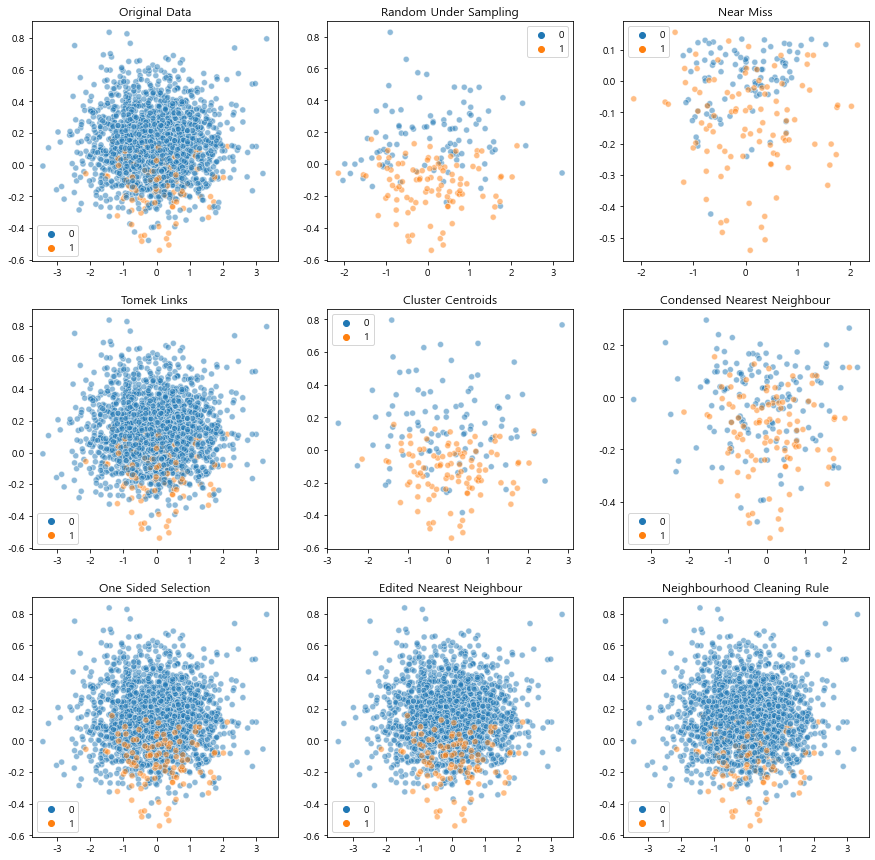

In [171]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

sns.scatterplot(x=x[:, 1], y=x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_under[:, 1], y=x_under[:, 2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_nm[:, 1], y=x_nm[:, 2], hue=y_nm, ax=axes[0][2], alpha=0.5)
sns.scatterplot(x=x_tl[:, 1], y=x_tl[:, 2], hue=y_tl, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_cc[:, 1], y=x_cc[:, 2], hue=y_cc, ax=axes[1][1], alpha=0.5)
sns.scatterplot(x=x_cnn[:, 1], y=x_cnn[:, 2], hue=y_cnn, ax=axes[1][2], alpha=0.5)
sns.scatterplot(x=x_oss[:, 1], y=x_oss[:, 2], hue=y_oss, ax=axes[2][0], alpha=0.5)
sns.scatterplot(x=x_enn[:, 1], y=x_enn[:, 2], hue=y_enn, ax=axes[2][1], alpha=0.5)
sns.scatterplot(x=x_ncr[:, 1], y=x_ncr[:, 2], hue=y_ncr, ax=axes[2][2], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[0][2].set_title('Near Miss')
axes[1][0].set_title('Tomek Links')
axes[1][1].set_title('Cluster Centroids')
axes[1][2].set_title('Condensed Nearest Neighbour')
axes[2][0].set_title('One Sided Selection')
axes[2][1].set_title('Edited Nearest Neighbour')
axes[2][2].set_title('Neighbourhood Cleaning Rule')

plt.show()

### (2) Over-sampling
- 소수 클래스의 데이터가 많아지면서 소수 클래스의 가중치 증가
- Under-sampling보다 대체로 성능이 좋음

#### Random
- 소수 클래스 데이터를 단순 복제
- 같은 데이터가 복제되어 과적합 주의 필요

In [172]:
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
pd.DataFrame(y_over).value_counts()

0    1900
1     950
dtype: int64

In [173]:
oversample = RandomOverSampler(sampling_strategy='minority') # 작은 사이즈 클래스를 큰 사이즈에 맞춤
x_over, y_over = oversample.fit_resample(x, y)
pd.DataFrame(y_over).value_counts()

1    1900
0    1900
dtype: int64

#### SMOTE
- 알고리즘이 가미된 Over-sampling으로 일반적인 Over-sampling보다 시간 소요가 긴 편
- 소수 레이블의 값과 K-NN 사이에 임의의 새로운 데이터 생성. Recall 상승에 최적이며 K-NN을 사용하므로 수치형 데이터에 사용하는 것이 좋음
    - SMOTEN: Nominal (Categorical) data
    - SMOTENC: Nominal and Continuous data. categorical_features를 리스트 형태의 파라미터로 제시해야 함

In [174]:
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
pd.DataFrame(y_sm).value_counts()

1    1900
0    1900
dtype: int64

#### Borderline SMOTE
- Borderline 부분에 대해서만 SMOTE 방식을 사용하는 것
    - 소수 범주의 데이터 한 개에 대해서 주변의 K개 데이터를 탐색하고 그중 다수 범주 데이터의 수를 확인
    - 주변 K개 데이터 중 다수 범주 데이터의 수가 K/2 ~ K 에 속할 경우 Danger 관측치라고 하는데, 이 관측치에 대해서만 SMOTE 적용

In [175]:
b_smote_sample = BorderlineSMOTE(sampling_strategy='minority') 
x_bsm, y_bsm = b_smote_sample.fit_resample(x, y)
pd.DataFrame(y_bsm).value_counts()

1    1900
0    1900
dtype: int64

#### ADASYN (Adaptive Synthetic Sampling)
- Borderline SMOTE 방법과 유사하나, 샘플링 개수를 데이터 위치에 따라 다르게 설정함
    - 모든 소수 범주 데이터에 대해 주변의 K개의 데이터를 탐색하고 다수 범주 데이터의 비율 계산
    - 소수 범주 데이터 주변의 다수 범주 데이터의 수에 따라 유동적으로 생성 가능

In [176]:
adasyn_sample = ADASYN(sampling_strategy='minority') 
x_ada, y_ada = adasyn_sample.fit_resample(x, y)
pd.DataFrame(y_ada).value_counts()

0    1900
1    1897
dtype: int64

#### SVM SMOTE
- SVM의 hyperplane 경계면에 minor class 데이터 생성

In [177]:
svm_smote_sample = SVMSMOTE(sampling_strategy='minority') 
x_ssm, y_ssm = svm_smote_sample.fit_resample(x, y)
pd.DataFrame(y_ssm).value_counts()

1    1900
0    1900
dtype: int64

#### K-means SMOTE
- 데이터를 우선 클러스터링하여 minor class가 적게 포함된 군집 주변으로 synthetic 데이터 생성

In [178]:
kmeans_smote_sample = KMeansSMOTE(sampling_strategy='minority', cluster_balance_threshold=0.1) 
x_ksm, y_ksm = kmeans_smote_sample.fit_resample(x, y)
pd.DataFrame(y_ksm).value_counts()

1    1901
0    1900
dtype: int64

#### Visualization

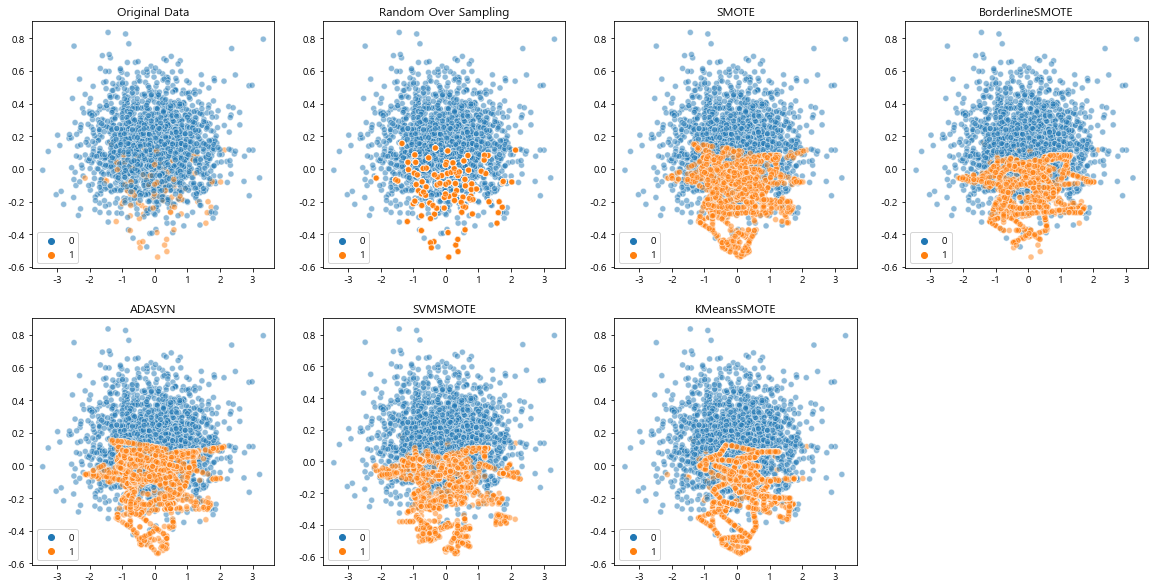

In [179]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.delaxes(axes[1][3])

sns.scatterplot(x=x[:, 1], y=x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_over[:, 1], y=x_over[:, 2], hue=y_over, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_sm[:, 1], y=x_sm[:, 2], hue=y_sm, ax=axes[0][2], alpha=0.5)
sns.scatterplot(x=x_bsm[:, 1], y=x_bsm[:, 2], hue=y_bsm, ax=axes[0][3], alpha=0.5)
sns.scatterplot(x=x_ada[:, 1], y=x_ada[:, 2], hue=y_ada, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_ssm[:, 1], y=x_ssm[:, 2], hue=y_ssm, ax=axes[1][1], alpha=0.5)
sns.scatterplot(x=x_ksm[:, 1], y=x_ksm[:, 2], hue=y_ksm, ax=axes[1][2], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Over Sampling')
axes[0][2].set_title('SMOTE')
axes[0][3].set_title('BorderlineSMOTE')
axes[1][0].set_title('ADASYN')
axes[1][1].set_title('SVMSMOTE')
axes[1][2].set_title('KMeansSMOTE')

plt.show()

### (3) Combine

#### SMOTE+ENN
- SMOTE(Synthetic Minority Over-sampling Technique) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것

In [180]:
smenn = SMOTEENN(sampling_strategy='minority') 
x_smenn, y_smenn = smenn.fit_resample(x, y)
pd.DataFrame(y_smenn).value_counts()

1    1831
0    1715
dtype: int64

#### SMOTE+Tomek
- SMOTE 방법과 Tomek Link 방법을 섞은 것

In [181]:
smtl = SMOTETomek(sampling_strategy='minority') 
x_smtl, y_smtl = smtl.fit_resample(x, y)
pd.DataFrame(y_smtl).value_counts()

1    1892
0    1892
dtype: int64

#### Visualization

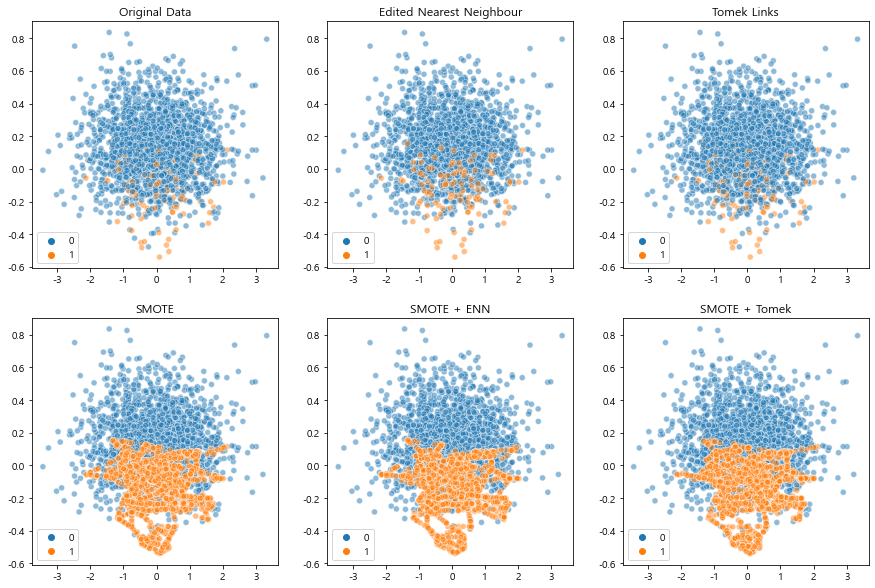

In [182]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.scatterplot(x=x[:, 1], y=x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_enn[:, 1], y=x_enn[:, 2], hue=y_enn, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_tl[:, 1], y=x_tl[:, 2], hue=y_tl, ax=axes[0][2], alpha=0.5)
sns.scatterplot(x=x_sm[:, 1], y=x_sm[:, 2], hue=y_sm, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_smenn[:, 1], y=x_smenn[:, 2], hue=y_smenn, ax=axes[1][1], alpha=0.5)
sns.scatterplot(x=x_smtl[:, 1], y=x_smtl[:, 2], hue=y_smtl, ax=axes[1][2], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Edited Nearest Neighbour')
axes[0][2].set_title('Tomek Links')
axes[1][0].set_title('SMOTE')
axes[1][1].set_title('SMOTE + ENN')
axes[1][2].set_title('SMOTE + Tomek')

plt.show()

## Time-series Data
- 분해 시계열: 추세요인, 계절요인, 순환요인, 불규칙요인 (잔차)
- Multiplicative(추세에 따른 계절성이 있는 경우), Additvie(추세와 계절성이 별도로 존재하는 경우)

### (1) Generate
- datetime 생성 methods
- pd.date_range, pd.period_range
- 시간 데이터가 존재하지 않는 시계열 데이터 처리할 때 유용

In [183]:
pd.date_range('2016-01-01', periods=3, freq='D') # day 기준, 3개 생성

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03'], dtype='datetime64[ns]', freq='D')

In [184]:
pd.date_range('2016-01-01', periods=4, freq='W')  # week 기준, 4개 생성

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24'], dtype='datetime64[ns]', freq='W-SUN')

In [185]:
pd.date_range('2016-01-01', '2016-01-02', freq='30T')[:2]  # 해당 날짜 사이 30분단위 생성

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:30:00'], dtype='datetime64[ns]', freq='30T')

In [186]:
pd.period_range('2012-01-01', freq='A', periods=2) # 연 단위 날짜 2개

PeriodIndex(['2012', '2013'], dtype='period[A-DEC]', freq='A-DEC')

In [187]:
pd.period_range('2012-01-01', freq='Q', periods=3) # 분기 단위 날짜 3개

PeriodIndex(['2012Q1', '2012Q2', '2012Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

### (2) Shift, Rolling

In [188]:
arima_data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


In [189]:
arima_data['price'].shift(3).head() # price의 값을 3칸 아래로 이동

day
2013-01-01       NaN
2013-02-01       NaN
2013-03-01       NaN
2013-04-01    3794.0
2013-05-01    3863.0
Name: price, dtype: float64

In [190]:
arima_data['price'].shift(-3).tail() # price의 값을 3칸 위로 이동

day
2017-08-01    7676.0
2017-09-01    5809.0
2017-10-01       NaN
2017-11-01       NaN
2017-12-01       NaN
Name: price, dtype: float64

In [191]:
arima_data['price'].rolling(3).mean().head() # price의 과거 3개 값의 평균

day
2013-01-01            NaN
2013-02-01            NaN
2013-03-01    4282.333333
2013-04-01    4945.333333
2013-05-01    5757.000000
Name: price, dtype: float64

In [192]:
arima_data['price'].rolling(3, min_periods=1).mean().head() # min_periods : 1, 2행을 과거 1, 2행 값만으로 계산

day
2013-01-01    3794.000000
2013-02-01    3828.500000
2013-03-01    4282.333333
2013-04-01    4945.333333
2013-05-01    5757.000000
Name: price, dtype: float64

### (3) Resample
- 시간 단위별로 grouping
    - Y, M, D, H, T(min), S등의 rule 지정
- 시간 컬럼을 index로 지정하거나, on parameter 이용
- groupby와 유사하며, groupby와 함께 이용하는 것도 가능

In [193]:
birth_data.reset_index(drop=True, inplace=True)

In [194]:
birth_data['Date'] = pd.to_datetime(birth_data['Date']) # DateTime으로 변경 후 index로 지정
# birth_data.set_index('Date', drop=True, inplace=True)
birth_data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [195]:
birth_data.resample(rule='2D', closed='right', label='right', on='Date').mean() # 2일 평균을 계산하되, 부등호와 label 값은 오른쪽(최신) 값으로

,Births
Date,
1959-01-01,35.0
1959-01-03,31.0
1959-01-05,37.5
1959-01-07,37.0
1959-01-09,40.5
...,...
1959-12-23,39.5
1959-12-25,41.0
1959-12-27,35.5


In [196]:
birth_data.resample(rule='3M', on='Date').sum() # 3개월 단위로 sum

,Births
Date,
1959-01-31,1213
1959-04-30,3561
1959-07-31,3720
1959-10-31,4165
1960-01-31,2664


In [197]:
birth_data.set_index('Date').resample(rule='M').asfreq() # 1개월 단위로 해당 기간의 대표 날짜 데이터 추출. set_index 반드시 필요

,Births
Date,
1959-01-31,24
1959-02-28,30
1959-03-31,41
1959-04-30,51
1959-05-31,38
1959-06-30,59
1959-07-31,41
1959-08-31,44
1959-09-30,56


### (4) Upsampling/Downsampling
- Resample 메소드를 사용한 시간 단위 변경

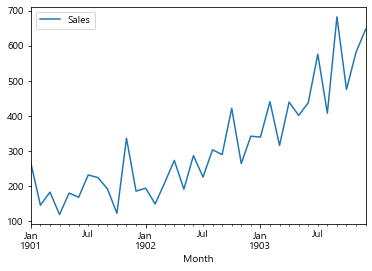

In [198]:
shampoo.plot()
plt.show()

#### Upsampling

In [199]:
upsampled = shampoo.resample('D').mean() # Day frequency
upsampled

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
...,...
1903-11-27,NaN
1903-11-28,NaN
1903-11-29,NaN


In [200]:
print(shampoo.shape, upsampled.shape)

(36, 1) (1065, 1)


In [201]:
rng = pd.date_range('2019-12-31', periods=3, freq='5S')
ts = pd.DataFrame(np.array([0, 1, 3, 2, 10, 3]).reshape(3, 2), index=rng, columns=['col_1', 'col_2'])
ts

,col_1,col_2
2019-12-31 00:00:00,0,1
2019-12-31 00:00:05,3,2
2019-12-31 00:00:10,10,3


In [202]:
ts_upsample = ts.resample('S').mean() # Second frequency로 평균 시간 만들기
ts_upsample

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,NaN,NaN
2019-12-31 00:00:02,NaN,NaN
2019-12-31 00:00:03,NaN,NaN
2019-12-31 00:00:04,NaN,NaN
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,NaN,NaN
2019-12-31 00:00:07,NaN,NaN
2019-12-31 00:00:08,NaN,NaN
2019-12-31 00:00:09,NaN,NaN


#### Downsampling (merge)

In [203]:
resample = shampoo.resample('Q') # Quarter-aware
quarterly_mean_sales = resample.mean()

In [204]:
quarterly_mean_sales.shape

(12, 1)

In [205]:
# Time 단위 downsampling
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [206]:
series.resample('3T').sum() # 3시간 단위로 sum 하되, label은 가장 빠른 시간으로

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [207]:
series.resample('3T', label='right').sum() # label을 마지막 시간으로

2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

In [208]:
series.resample('3T', label='right', closed='right').sum() # 오른쪽 부등호에 등호 붙이기

2000-01-01 00:00:00     0
2000-01-01 00:03:00     6
2000-01-01 00:06:00    15
2000-01-01 00:09:00    15
Freq: 3T, dtype: int64

### (5) Missing Value
- Fill
- Moving Average
- Interpolation

#### Fill
- Forward/Backward
- 전후 값으로 채우거나, 특정 값으로 채우기

In [209]:
# ts_upsample.ffill()
# 앞의 값으로 채우기
ts_upsample.fillna(method='ffill')

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.0,1.0
2019-12-31 00:00:02,0.0,1.0
2019-12-31 00:00:03,0.0,1.0
2019-12-31 00:00:04,0.0,1.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,3.0,2.0
2019-12-31 00:00:07,3.0,2.0
2019-12-31 00:00:08,3.0,2.0
2019-12-31 00:00:09,3.0,2.0


In [210]:
# ts_upsample.bfill()
# 뒤의 값으로 채우기
ts_upsample.fillna(method='bfill')

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,3.0,2.0
2019-12-31 00:00:02,3.0,2.0
2019-12-31 00:00:03,3.0,2.0
2019-12-31 00:00:04,3.0,2.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,10.0,3.0
2019-12-31 00:00:07,10.0,3.0
2019-12-31 00:00:08,10.0,3.0
2019-12-31 00:00:09,10.0,3.0


In [211]:
# 평균으로 채우기 
ts_upsample.fillna(ts_upsample.mean())

,col_1,col_2
2019-12-31 00:00:00,0.000000,1.0
2019-12-31 00:00:01,4.333333,2.0
2019-12-31 00:00:02,4.333333,2.0
2019-12-31 00:00:03,4.333333,2.0
2019-12-31 00:00:04,4.333333,2.0
2019-12-31 00:00:05,3.000000,2.0
2019-12-31 00:00:06,4.333333,2.0
2019-12-31 00:00:07,4.333333,2.0
2019-12-31 00:00:08,4.333333,2.0
2019-12-31 00:00:09,4.333333,2.0


In [212]:
# 중앙값으로 채우기 
ts_upsample.fillna(ts_upsample.median())

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,3.0,2.0
2019-12-31 00:00:02,3.0,2.0
2019-12-31 00:00:03,3.0,2.0
2019-12-31 00:00:04,3.0,2.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,3.0,2.0
2019-12-31 00:00:07,3.0,2.0
2019-12-31 00:00:08,3.0,2.0
2019-12-31 00:00:09,3.0,2.0


#### Moving Average
- 과거의 여러 시간대 데이터를 사용하여 Fill
- NA가 연속적으로 있거나, 맨 앞에 있는 경우 등을 대비하여 적절한 min_periods 설정 필요

In [213]:
ts_upsample.fillna(ts_upsample.rolling(5, min_periods=1).mean())

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.0,1.0
2019-12-31 00:00:02,0.0,1.0
2019-12-31 00:00:03,0.0,1.0
2019-12-31 00:00:04,0.0,1.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,3.0,2.0
2019-12-31 00:00:07,3.0,2.0
2019-12-31 00:00:08,3.0,2.0
2019-12-31 00:00:09,3.0,2.0


In [214]:
ts_upsample.fillna(ts_upsample.rolling(4, min_periods=1).mean())

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.0,1.0
2019-12-31 00:00:02,0.0,1.0
2019-12-31 00:00:03,0.0,1.0
2019-12-31 00:00:04,NaN,NaN
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,3.0,2.0
2019-12-31 00:00:07,3.0,2.0
2019-12-31 00:00:08,3.0,2.0
2019-12-31 00:00:09,NaN,NaN


#### Interpolation
- 시계열 데이터의 앞, 뒤 데이터 확인하여 결측치 보정(추정)
- methods
    - 값 기준: value, time
    - 모델 기준: linear, nearest, zero, slinear, quadratic, cubic, spline, polynomial, ...
        - spline, polynomial의 경우 차수 지정 필요

In [215]:
ts_upsample.interpolate(method='values') # 값 기준 선형 보간

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.6,1.2
2019-12-31 00:00:02,1.2,1.4
2019-12-31 00:00:03,1.8,1.6
2019-12-31 00:00:04,2.4,1.8
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,4.4,2.2
2019-12-31 00:00:07,5.8,2.4
2019-12-31 00:00:08,7.2,2.6
2019-12-31 00:00:09,8.6,2.8


In [216]:
ts_upsample.interpolate(method='time') # 시간 기준 선형 보간

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.6,1.2
2019-12-31 00:00:02,1.2,1.4
2019-12-31 00:00:03,1.8,1.6
2019-12-31 00:00:04,2.4,1.8
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,4.4,2.2
2019-12-31 00:00:07,5.8,2.4
2019-12-31 00:00:08,7.2,2.6
2019-12-31 00:00:09,8.6,2.8


In [217]:
upsampled.interpolate(method='nearest') # 가까운 값으로 대치

,Sales
Month,
1901-01-01,266.0
1901-01-02,266.0
1901-01-03,266.0
1901-01-04,266.0
1901-01-05,266.0
...,...
1903-11-27,646.9
1903-11-28,646.9
1903-11-29,646.9


In [218]:
upsampled.interpolate(method='linear') # 선형으로 값 채우기

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [219]:
upsampled.interpolate(option='polynomial') # 다항식 사용 (method='polynomial', order=1과 동일) -> linear

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [220]:
upsampled.interpolate(method='polynomial', order=2)  # 2차 다항식 사용 (method='quadratic'과 동일)

,Sales
Month,
1901-01-01,266.000000
1901-01-02,258.653962
1901-01-03,251.539381
1901-01-04,244.656256
1901-01-05,238.004587
...,...
1903-11-27,645.313391
1903-11-28,645.916583
1903-11-29,646.382082


In [221]:
upsampled.interpolate(method='polynomial', order=3)  # 3차 다항식 사용 (method='cubic'과 동일)

,Sales
Month,
1901-01-01,266.000000
1901-01-02,254.716321
1901-01-03,244.085408
1901-01-04,234.090834
1901-01-05,224.716170
...,...
1903-11-27,668.557878
1903-11-28,664.407193
1903-11-29,659.433083


In [222]:
upsampled.interpolate(method='zero') # zero-order spline

,Sales
Month,
1901-01-01,266.0
1901-01-02,266.0
1901-01-03,266.0
1901-01-04,266.0
1901-01-05,266.0
...,...
1903-11-27,581.3
1903-11-28,581.3
1903-11-29,581.3


In [223]:
upsampled.interpolate(option='spline') # smooth surface 보간 (method='spline', order=1 또는 method='slinear'와동일)

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [224]:
upsampled.interpolate(method='spline', order=2) # 2차 smooth surface

,Sales
Month,
1901-01-01,266.000000
1901-01-02,258.630160
1901-01-03,251.560886
1901-01-04,244.720748
1901-01-05,238.109746
...,...
1903-11-27,645.060131
1903-11-28,645.754167
1903-11-29,646.316013


In [225]:
### dataframe with index as timeseries
time_sdata = pd.date_range("09/10/2021", periods=9, freq="W")

df = pd.DataFrame(index=time_sdata)
df["example"] = [10001.0, 10002.0, 10003.0, np.nan, 10004.0, np.nan, np.nan, 10005.0, np.nan]
df

,example
2021-09-12,10001.0
2021-09-19,10002.0
2021-09-26,10003.0
2021-10-03,NaN
2021-10-10,10004.0
2021-10-17,NaN
2021-10-24,NaN
2021-10-31,10005.0
2021-11-07,NaN


In [226]:
df.interpolate()

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,10004.333333
2021-10-24,10004.666667
2021-10-31,10005.000000
2021-11-07,10005.000000


In [227]:
### Interpolating Missing Values to two values
# forward 방향으로 1개까지 Missing data 처리 (보간 개수 제한)
df.interpolate(limit=1, limit_direction="forward")

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,10004.333333
2021-10-24,NaN
2021-10-31,10005.000000
2021-11-07,10005.000000


In [228]:
# 아래에서 위로 보간
df.interpolate(method='values', limit=1, limit_direction='backward')

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,NaN
2021-10-24,10004.666667
2021-10-31,10005.000000
2021-11-07,NaN


### (6) Decomposition
- 시계열 데이터를 Trend, Seasonal, Cycle, Irregular 요소로 분해
- Moving average, Exponential smoothing, STL (Seasonal and Trend decomposition using Losses)

#### Moving average
- 일정 기간 별 이동평균 계산
- 계절, 불규칙 변동 제거

In [229]:
### get smoothing (MA) line
# computing a 7 day rolling average
birth_data['7day_rolling_avg'] = birth_data.Births.rolling(7).mean()

In [230]:
from matplotlib import dates

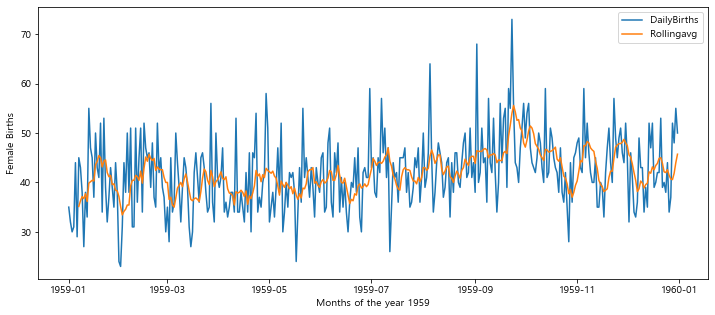

In [231]:
# set figure size
plt.figure(figsize=(12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot(x='Date', y='Births', data=birth_data, label='DailyBirths')

# plot using rolling average
sns.lineplot(x='Date', y='7day_rolling_avg', data=birth_data, label='Rollingavg')
plt.xlabel('Months of the year 1959')
plt.ylabel('Female Births')
plt.show()

#### Exponential smoothing
- 모든 시계열 자료를 통해서 평균을 계산하며, 최근 데이터에 가중치 부여
- 예측 모델로 사용되기도 함
- 불규칙변동 제거

In [232]:
birth_data['smooth_3'] = birth_data['Births'].ewm(alpha=0.3).mean() # alpha: 지수평활계수

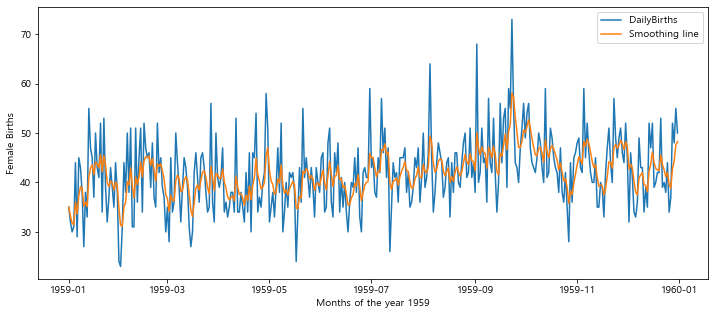

In [233]:
# set figure size
plt.figure(figsize=(12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot(x='Date', y='Births', data=birth_data, label='DailyBirths')

# plot using rolling average
sns.lineplot(x='Date', y='smooth_3', data=birth_data, label='Smoothing line')
plt.xlabel('Months of the year 1959')
plt.ylabel('Female Births')
plt.show()

#### STL Decomposition

In [234]:
from statsmodels.tsa.seasonal import seasonal_decompose

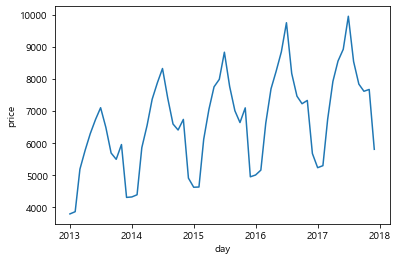

In [235]:
sns.lineplot(x=arima_data.index, y=arima_data['price'])
plt.show()

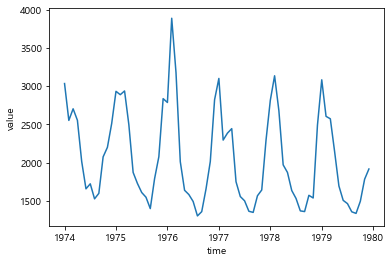

In [236]:
sns.lineplot(x=ldeaths.time, y=ldeaths.value)
plt.show()

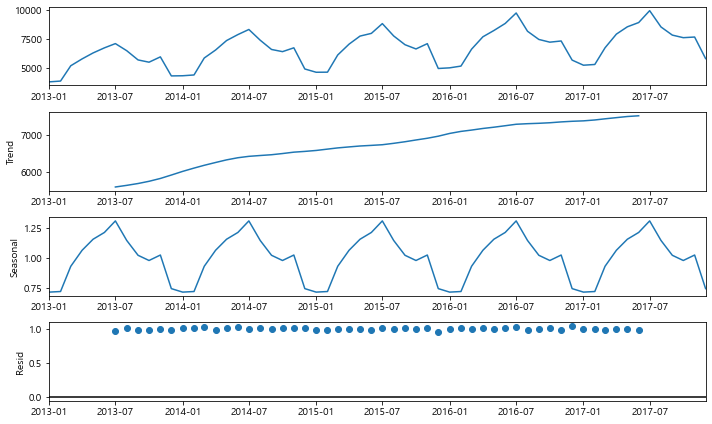

In [237]:
### Seasonal decomposition
ts = arima_data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

In [238]:
# 시간 변환
ldeaths['time'] = pd.Series([f'{y}-{m+1}' for y in range(1974, 1980) for m in range(12)])
ldeaths['time'] = pd.to_datetime(ldeaths['time'], format="%Y-%m")
ldeaths.set_index('time', inplace=True)
ldeaths.head(3)

,value
time,
1974-01-01,3035
1974-02-01,2552
1974-03-01,2704


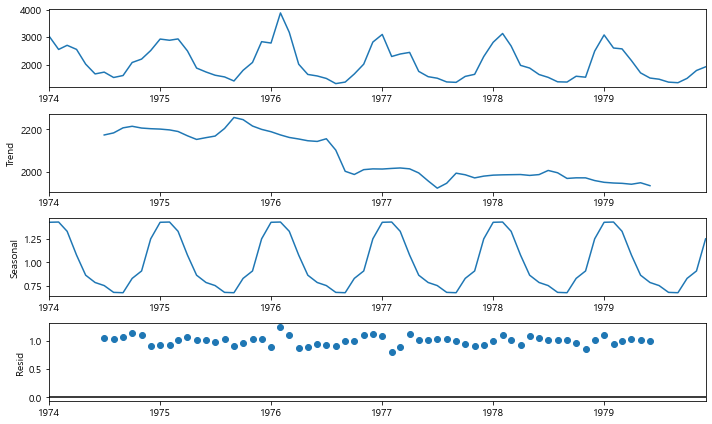

In [239]:
ts = ldeaths
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

### (7) Differencing,  Transformation
- 비정상 시계열을 정상 시계열로 만드는 기법
- Differencing
    - 추세와 계절성 제거
- Transformation
    - 분산 변동폭 제거
    - Log, Box-cox

#### Differencing

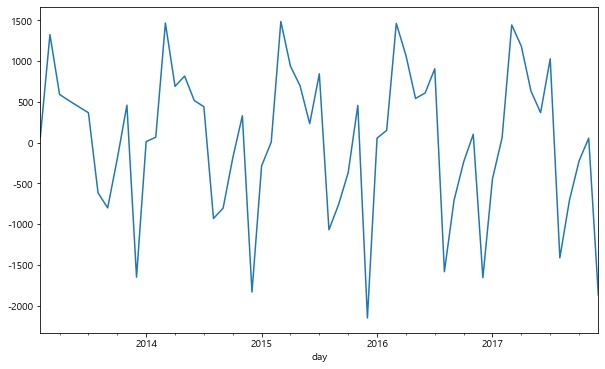

In [240]:
diff_data = arima_data['price'].diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

#### Transformation

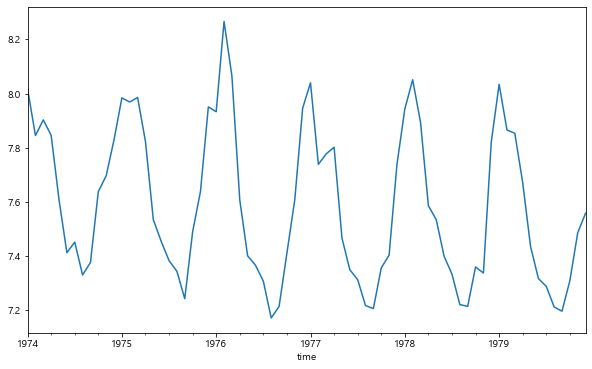

In [241]:
### Log Transformation
np.log(ldeaths['value']).plot()

In [242]:
from sklearn.preprocessing import PowerTransformer

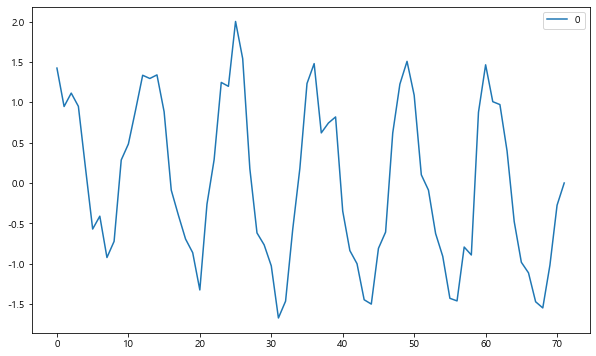

In [243]:
### Box-cox Transformation
ptb = PowerTransformer(method='box-cox')
sns.lineplot(data=ptb.fit_transform(ldeaths['value'].values.reshape(-1, 1)))
plt.show()